# Algortimo de regresión Adaline con SGD y BGD

- gradient descent stochastic (SGD)
Modifica los pesos sinapticos con una muestra aleatoria de la distribución. Entrenamiento en línea. Tiene ruido en su ruta en el mínimo local por la muestra aleatoria del dataset. 

- Batch gd (bgd)
Entrenamiento por lotes. Como se toma con cada una de las actualizaciones, la linea es más suave que el gradiente descendiente, se hace la corrección de los pesos por cada uno de los datos del problema.

- Metodo directo
El bias se agrega al arreglo de pesos sinápticos, el vector homogéneo de la entrada, y luego se genera la matriz.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *

In [3]:
def hypothesis(theta, X):
# input:
#     - theta_0 y theta_1
#     - conjunto de características (X) 
# output:
#     - valor de hipótesis de la variable objetivo (h)
    h = np.ones((X.shape[0],1))
    for i in range(0,X.shape[0]):
        x = np.concatenate((np.ones(1), np.array([X[i]])), axis = 0)
        h[i] = float(np.matmul(theta, x))
    h = h.reshape(X.shape[0])
    return h
# Stochastic Gradient Descent
def SGD(theta, learning_rate, epochs, h, X, y):
# input:
#     - theta_0 y theta_1
#     - tasa de aprendizaje
#     - numero de iteraciones
#     - lista de valores de hipótesis de todas las muestras (h)
#     - conjunto de características (X) 
#     - conjunto de variables objetivo (y)
# output:
#     - theta optimizado (theta_0 y theta_1)
    for i in range(0,epochs):
        theta[0] = theta[0] - (learning_rate) * (h - y)
        theta[1] = theta[1] - (learning_rate) * ((h - y) * X)
        h = theta[1]*X + theta[0] 
    return theta
def sgd_linear_regression(X, y, learning_rate, epochs):
# input:
#     - conjunto de características (X) 
#     - conjunto de variables objetivo (y)
#     - tasa de aprendizaje
#     - numero de iteraciones
# output:
#     - salida theta optimizada final
    theta = np.zeros(2)
    h = hypothesis(theta, X)    
    for i in range(0, X.shape[0]):
        theta = SGD(theta,learning_rate,epochs,h[i],X[i],y[i])
    theta = theta.reshape(1, 2)
    return theta
# Batch Gradient Descent 
def BGD(theta, learning_rate, epochs, h, X, y):
# input:
#     - theta_0 y theta_1
#     - tasa de aprendizaje
#     - numero de iteraciones
#     - lista de valores de hipótesis de todas las muestras (h)
#     - conjunto de características (X) 
#     - conjunto de variables objetivo (y)
# output:
#     - theta optimizado (theta_0 y theta_1)
#     - historial de theta_0
#     - historia de theta_1
#     - funcion de costo
    cost = np.ones(epochs)
    theta_0 = np.ones(epochs)
    theta_1 = np.ones(epochs)
    for i in range(0,epochs):
        theta[0] = theta[0] - (learning_rate/X.shape[0]) * sum(h - y)
        theta[1] = theta[1] - (learning_rate/X.shape[0]) * sum((h - y) * X)
        h = hypothesis(theta, X)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
        theta_0[i] = theta[0]
        theta_1[i] = theta[1]
    theta = theta.reshape(1,2)
    return theta, theta_0, theta_1, cost
# toma el conjunto de características (X), el conjunto de variables de destino (y), 
# la tasa de aprendizaje y el número de iteraciones (epochs) como entrada y 
# genera el theta optimizado final    
def bgd_linear_regression(X, y, learning_rate, epochs):
# input:
#     - conjunto de características (X) 
#     - conjunto de variables objetivo (y)
#     - tasa de aprendizaje
#     - numero de iteraciones
# output:
#     - theta optimizado (theta_0 y theta_1)
#     - historial de theta_0
#     - historia de theta_1
#     - funcion de costo
    theta = np.zeros(2)
    h = hypothesis(theta, X)    
    theta,theta_0,theta_1,cost= BGD(theta,learning_rate,epochs,h,X,y)
    return theta, theta_0, theta_1, cost
def mse_prediction(y_train, training_predictions):
    se = 0 # Square Error
    for i in range(0,y_train.shape[0]):
        se = se + pow((training_predictions[i] - y_train[i]), 2)
    MSE = se/y_train.shape[0] # Mean Square Error
    return MSE
def shuffle_split_data(X, y):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, 70)

    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]
    return X_train, y_train, X_test, y_test

------------------------------

## data exploration

In [4]:
data = np.genfromtxt('DataSet1.csv', delimiter=',', skip_header=True)

In [5]:
data[:5,:]

array([[0.82202  , 0.1675   ],
       [0.95587  , 0.0091221],
       [0.87913  , 0.15943  ],
       [0.38489  , 0.55851  ],
       [0.94356  , 0.040785 ]])

In [6]:
X = data[:,0]
y = data[:,1]
X_train, y_train, X_test, y_test = shuffle_split_data(X, y)

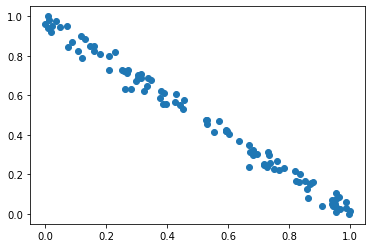

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

## sgd linear regression

In [8]:
learning_rate = 0.0001
num_iters = 100000
theta = sgd_linear_regression(X_train, y_train, learning_rate, num_iters)

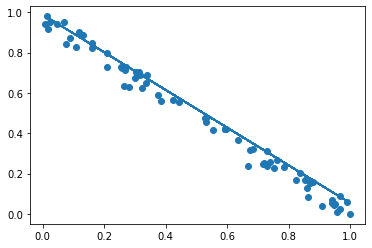

In [9]:
training_predictions = hypothesis(theta, X_train)
scatter = plt.scatter(X_train, y_train, label="training data")
regression_line = plt.plot(X_train, training_predictions ,label="linear regression")

In [11]:
training_predictions

array([0.22018823, 0.09507322, 0.1668052 , 0.62879132, 0.70946877,
       0.10937475, 0.43139284, 0.96785627, 0.72484525, 0.97659703,
       0.17622739, 0.59148583, 0.91808228, 0.7929224 , 0.17312405,
       0.67592094, 0.63740028, 0.43544961, 0.49288006, 0.68665176,
       0.18567761, 0.75193403, 0.10948692, 0.3506593 , 0.74293248,
       0.98042507, 0.1030746 , 0.49398306, 0.2854705 , 0.06393702,
       0.30777341, 0.18314447, 0.27721674, 0.86690711, 0.69361557,
       0.08563234, 0.30645543, 0.29904293, 0.83944443, 0.20582127,
       0.69587765, 0.35940847, 0.43509441, 0.87811465, 0.88703207,
       0.79266067, 0.57553916, 0.49345025, 0.05521589, 0.31770035,
       0.39505947, 0.08407133, 0.74782117, 0.1399688 , 0.8392014 ,
       0.90622696, 0.70533722, 0.67202307, 0.73437026, 0.316803  ,
       0.09919543, 0.92290834, 0.73857659, 0.43419706, 0.2553999 ,
       0.47161472, 0.97242809, 0.36382045, 0.19115519, 0.94436905])

In [10]:
print(mse_prediction(y_train, training_predictions))

0.0022284801954406182


-------------------------------------

## bgd_linear_regression

In [193]:
learning_rate = 0.1
num_iters = 500
theta,theta_0,theta_1,cost=bgd_linear_regression(X_train,y_train,learning_rate, num_iters)

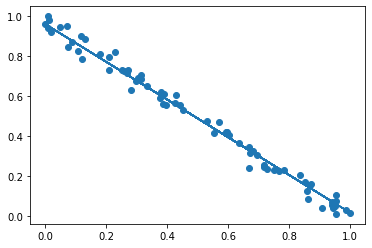

In [194]:
training_predictions = hypothesis(theta, X_train)
scatter = plt.scatter(X_train, y_train, label="training data")
regression_line = plt.plot(X_train, training_predictions, label="linear regression")

Text(0, 0.5, 'Cost')

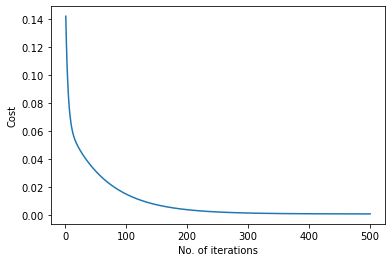

In [195]:
cost = list(cost)
n_iterations = [x for x in range(1,num_iters + 1)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [196]:
print(mse_prediction(y_train, training_predictions))

0.001085905087268426
